In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
iris  = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [3]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
92,5.8,2.6,4.0,1.2,versicolor,0
141,6.9,3.1,5.1,2.3,virginica,1
130,7.4,2.8,6.1,1.9,virginica,1
119,6.0,2.2,5.0,1.5,virginica,1
48,5.3,3.7,1.5,0.2,setosa,0


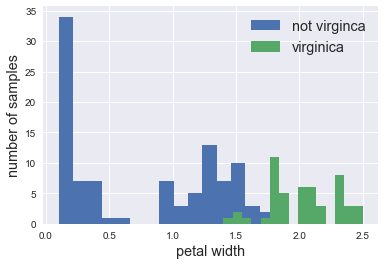

In [4]:
fig, ax = plt.subplots()
iris.groupby('isVirginica').hist(column='petal_width', ax = ax, bins=15);
plt.legend(['not virginca', 'virginica']);
plt.xlabel('petal width')
plt.title('');
plt.ylabel('number of samples');

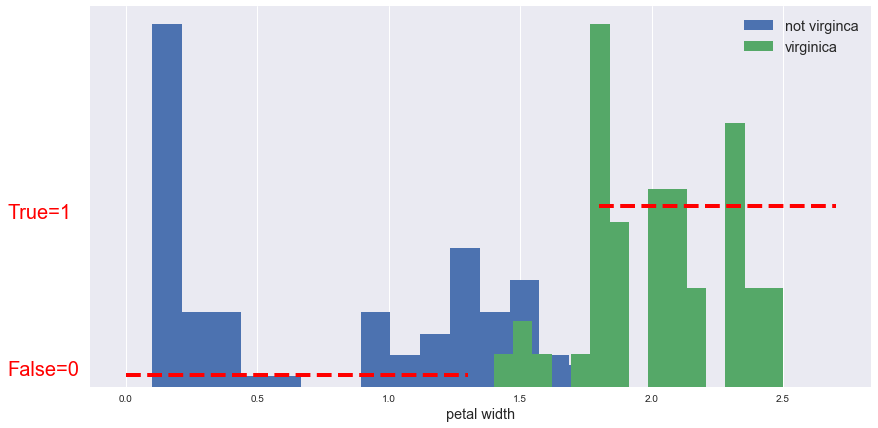

In [87]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width',  normed=True, ax = ax, bins=15)
plt.legend(['not virginca', 'virginica'])
plt.xlabel('petal width')
plt.title('')
plt.yticks([])
plt.plot([0,1.3],[0.1,0.1],'r--',[1.8,2.7],[1.5,1.5],'r--',linewidth=4)
#plt.plot([1.8,2.7],[1.5,1.5],'r--',linewidth=5)
plt.text(-.45,.1,'False=0',fontsize=20,color='r')
plt.text(-.45,1.4,'True=1',fontsize=20,color='r')
plt.savefig('../reports/probas1.png')

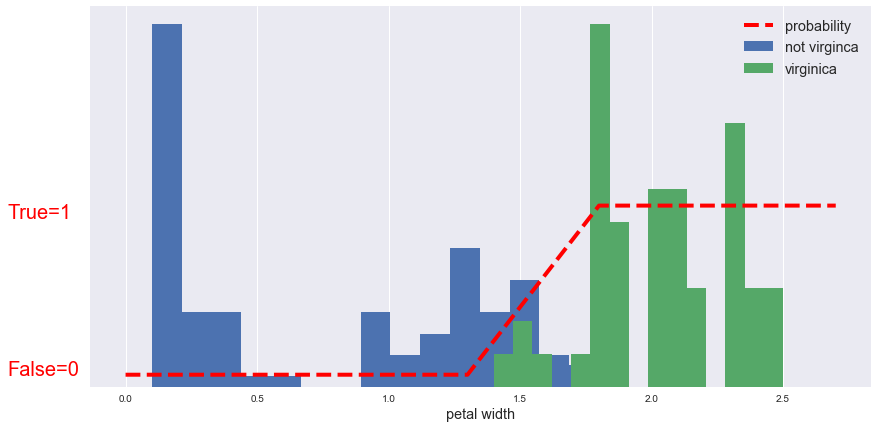

In [88]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width',  normed=True, ax = ax, bins=15);
plt.xlabel('petal width')
plt.title('')
plt.yticks([])
plt.plot([0,1.3,1.8,2.7],[.1,.1,1.5,1.5],'r--',linewidth=4)
plt.legend(['probability','not virginca', 'virginica']);
plt.text(-.45,.1,'False=0',fontsize=20,color='r')
plt.text(-.45,1.4,'True=1',fontsize=20,color='r')
plt.savefig('../reports/probas2.png')

In [40]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
114,5.8,2.8,5.1,2.4,virginica,1
49,5.0,3.3,1.4,0.2,setosa,0
138,6.0,3.0,4.8,1.8,virginica,1
23,5.1,3.3,1.7,0.5,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0


In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
np.set_printoptions(suppress=True, precision=2)

In [42]:
model.fit(iris[['petal_width']], iris['isVirginica'])
model.coef_ , model.intercept_

(array([[2.62]]), array([-4.22]))

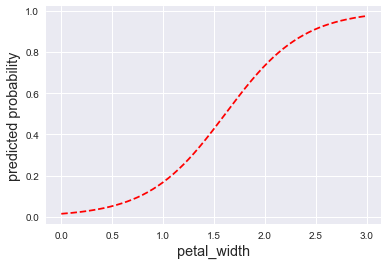

In [43]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

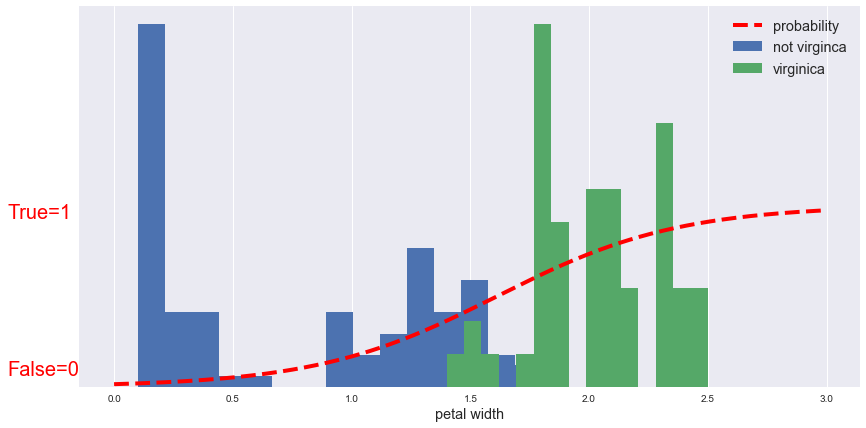

In [89]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width',  normed=True, ax = ax, bins=15);
plt.xlabel('petal width')
plt.title('')
plt.yticks([])
plt.plot(petal_widths, 1.5*predicted_proba,'r--',linewidth=4)
plt.legend(['probability','not virginca', 'virginica'])
plt.text(-.45,.1,'False=0',fontsize=20,color='r')
plt.text(-.45,1.4,'True=1',fontsize=20,color='r')
plt.savefig('../reports/probas3.png')

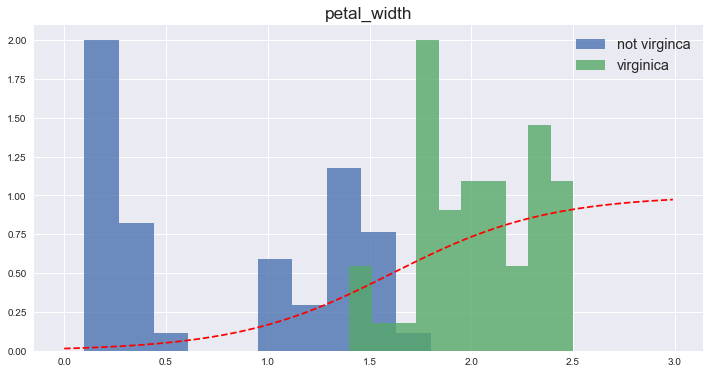

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--');

### How to evaluate the model?  

<font size=5>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [ ]:
model.score(iris[['petal_width']], iris[['isVirginica']])

### Graphical representation of logistic regression
Choose the parameters:

* W (the weight)
* B (the bias)

![logistic regression](../reports/figures/01-log.png)

This is a (very) simple example of a neural network

# 1.4 Keras

In [ ]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

In [ ]:
model = Sequential([
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid') # for the sigmoid function
])
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [ ]:
model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=500, verbose=False);
model.get_weights()

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--')

# (Section 2) Gradient descent

## How does this work? 

# 2.1 Optimization, gradient descent with Keras

In [ ]:
model = Sequential([
    Dense(1,input_dim=1, kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'), 
])

In [ ]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
x_grid, y_grid = np.mgrid[-10:10:.1,-10:10:.1]

In [ ]:
def get_accuracy(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy= model.evaluate(iris[['petal_width']], \
                              iris[['isVirginica']],verbose=0)[1]
    return accuracy

In [ ]:
vaccuracy = np.vectorize(get_accuracy)

In [ ]:
#takes two minutes to run
acc_grid = vaccuracy(x_grid,y_grid)

In [ ]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

In [ ]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
ax_acc.set(title='Accuracy', xlabel='Weght (w)', ylabel='Bias (b)');

## Problem: the accuracy is constant on huge zones

# 2.2 The cross entropy  loss function

<font size=6>
Fix the weigth $W$ and bias $B$. 
<br><br><br>
$$\mathcal{L}(p,y) := y \log(p) + (1-y)\log(1-p)$$
 <br>
$$\text{Loss} :=\sum_{i=1}^n \mathcal{L}(p_i,y_i) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
<br>
where </font>

*  <font size=4>$y_i\in \{0,1\}$ is the class of the i-th sample</font>

*  <font size=4>$p_i \in [0,1]$ is the predicted probability $P_{w,b}(x_i)$ calculated by the logistic regression model for parameter values $w$ and $b$</font>

In [ ]:
probas = np.arange(0,1,.01)
loss0 = -np.log(1-probas)
loss1 = - np.log(probas)
plt.plot(probas,loss0,label='y = 0')
plt.plot(probas,loss1,label='y = 1')
plt.xlabel('p=proba')
plt.ylabel('Loss')
plt.title('Loss function:  $\mathcal{L}(p,y)$')
plt.legend();

In [ ]:
def get_loss(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], \
                          verbose=0)[0]
    return loss
vloss = np.vectorize(get_loss)

In [ ]:
loss_grid = vloss(x_grid,y_grid) 

In [ ]:
import pickle
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

In [ ]:
model.layers[0].set_weights( [ np.array([[9]]) , np.array([9]) ] ) 

In [ ]:
fig , ax_loss = plt.subplots(figsize=(15,12))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('weight'); plt.ylabel('bias');
for i in range(20):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=30, verbose=0)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

# 3.1 Versicolor

In [ ]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.sample(5)

In [ ]:
fig, ax = plt.subplots()
iris.groupby('isVersicolor').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not versicolor', 'versicolor']);

## Goal: determine if an iris is a versicolor knowing its petal width

# 3.2 Let's try  logistic regression

In [ ]:
model = Sequential([
    Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])

In [ ]:
model.compile(optimizer=optimizers.SGD(lr=0.05), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(iris[['petal_width']], iris[['isVersicolor']], epochs=500)

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');

## BAD NEWS: PREDICTED PROBABILITIES BY LOGISTIC REGRESSION CAN NOT UP AND DOWN

# 3.3 Real neural networks

In [ ]:
model = Sequential()
model.add(Dense(3, input_dim=1 ))
model.add(Activation('sigmoid'))
model.add(Dense(1, input_dim=1 ) )
model.add(Activation('sigmoid'))
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

![NN](../reports/figures/02-hidden.png)

In [ ]:
plt.subplots(nrows=3,ncols=3,figsize=(18,8),sharex=True,sharey=True)
for i in range(1,7):
    plt.subplot(2,3, i)
    model.fit(iris[['petal_width']], iris[['isVersicolor']],epochs=300,verbose=0)
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], *ax.get_ylim(), linestyles='dotted');